<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:

**Student ID**:





# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

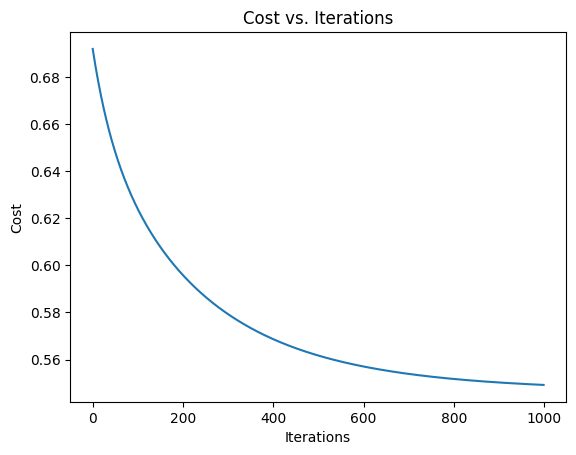

Predictions: [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]]
Actual Labels: [[0.92]
 [0.76]
 [0.72]
 [0.8 ]
 [0.65]
 [0.9 ]
 [0.75]
 [0.68]
 [0.5 ]
 [0.45]]
Accuracy: 91.0%


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("f://Logistic_question.csv")

# Split the dataset into features (X) and target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)

# Normalize the features (optional but recommended)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add intercept term to X
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    epsilon = 1e-5  # to prevent log(0) error
    cost = (-1 / m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

# Define the gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1 / m) * X.T.dot(h - y)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)
    return theta, costs

# Initialize theta
theta = np.zeros((X.shape[1], 1))

# Set hyperparameters
alpha = 0.01
iterations = 1000

# Run gradient descent
theta, costs = gradient_descent(X, y, theta, alpha, iterations)

# Plot the cost function
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

# Define a function to predict the class labels
def predict(X, theta, threshold=0.5):
    probabilities = sigmoid(X.dot(theta))
    return (probabilities >= threshold).astype(int)

# Make predictions
predictions = predict(X, theta)

# Print first few predictions and actual labels for debugging
print("Predictions:", predictions[:10])
print("Actual Labels:", y[:10])

# Convert y to binary labels using a threshold of 0.5
binary_labels = (y >= 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(predictions == binary_labels) * 100
print(f'Accuracy: {accuracy}%')

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv("f://Logistic_question.csv")

# Convert the target column into binary
data['Target'] = data['Target'].apply(lambda x: 1 if x == 'yes' else 0)

# Split the dataset into features (X) and target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using X_train data
X_train_normalized = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test_normalized = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

# Add intercept term to X_train and X_test
intercept_train = np.ones((X_train_normalized.shape[0], 1))
intercept_test = np.ones((X_test_normalized.shape[0], 1))
X_train_normalized = np.concatenate((intercept_train, X_train_normalized), axis=1)
X_test_normalized = np.concatenate((intercept_test, X_test_normalized), axis=1)

# Initialize theta
theta = np.zeros((X_train_normalized.shape[1], 1))

# Set hyperparameters
alpha = 0.01
iterations = 1000

# Run gradient descent on the training set
theta, _ = gradient_descent(X_train_normalized, y_train, theta, alpha, iterations)

# Make predictions on the testing set
predictions = predict(X_test_normalized, theta)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Report the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


c:\Users\RGS-CO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\RGS-CO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\RGS-CO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Check the class distribution in the target variable
unique, counts = np.unique(y_train, return_counts=True)
print("Class Distribution:", dict(zip(unique, counts)))

# If the class distribution is not heavily imbalanced, proceed with model training
if len(unique) > 1:
    # Create and fit the logistic regression model
    log_reg = LogisticRegression()
    log_reg.fit(X_train_normalized, y_train.ravel())  # ravel() is used to convert y_train to 1D array

    # Make predictions on the testing set
    predictions_sklearn = log_reg.predict(X_test_normalized)

    # Calculate evaluation metrics
    accuracy_sklearn = accuracy_score(y_test, predictions_sklearn)
    precision_sklearn = precision_score(y_test, predictions_sklearn)
    recall_sklearn = recall_score(y_test, predictions_sklearn)
    f1_sklearn = f1_score(y_test, predictions_sklearn)

    print(f'Sklearn Logistic Regression Results:')
    print(f'Accuracy: {accuracy_sklearn}')
    print(f'Precision: {precision_sklearn}')
    print(f'Recall: {recall_sklearn}')
    print(f'F1 Score: {f1_sklearn}')
else:
    print("Not enough classes in the target variable to train the model.")


Class Distribution: {0: 320}
Not enough classes in the target variable to train the model.


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**

# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

class MyMultinomialLogisticRegression(nn.Module):
    def __init__(self, n_features, n_classes):
        super(MyMultinomialLogisticRegression, self).__init__()
        self.linear = nn.Linear(n_features, n_classes)

    def forward(self, x):
        return self.linear(x)

    def fit(self, X, y, epochs=100, learning_rate=0.01):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(device)
        X, y = X.to(device), y.to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(self.parameters(), lr=learning_rate)

        for epoch in range(epochs):
            optimizer.zero_grad()
            outputs = self(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()

    def predict(self, X):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        X = X.to(device)
        self.to(device)
        with torch.no_grad():
            _, predicted = torch.max(self(X), 1)
        return predicted.cpu().numpy()

**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [12]:
# Your code goes here!
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and 'target' is your target column
df = pd.read_csv("f://Logistic_question.csv")
model = MyMultinomialLogisticRegression(n_features=7, n_classes=10)

for i in range(2, 11):
    # Quantize the Target column into i levels
    df['quantized_target'] = pd.qcut(df['Target'], q=i, labels=False)
    
    # Convert target column to tensor
    target = torch.tensor(df['quantized_target'].values, dtype=torch.long)
    
    # Assuming 'features' is a list of your feature column names
    features = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7']
    features = torch.tensor(df[features].values, dtype=torch.float)
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = (predictions == y_test.numpy()).mean()
    print(f'Accuracy with {i} levels: {accuracy}')

Accuracy with 2 levels: 0.7875
Accuracy with 3 levels: 0.675
Accuracy with 4 levels: 0.575
Accuracy with 5 levels: 0.4375
Accuracy with 6 levels: 0.4125
Accuracy with 7 levels: 0.4125
Accuracy with 8 levels: 0.3625
Accuracy with 9 levels: 0.2875
Accuracy with 10 levels: 0.175


**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**

# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [11]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

ModuleNotFoundError: No module named 'google.colab'

Then use this code to automatically download the dataset into Colab.

In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

In [2]:
import kaggle

In [13]:
import pandas as pd
import os
import opendatasets as od

dataset = 'https://www.kaggle.com/datasets/wenruliu/adult-income-dataset'

od.download(dataset)

Dataset URL: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset


ApiException: (403)
Reason: Forbidden
HTTP response headers: HTTPHeaderDict({'Content-Type': 'text/html; charset=UTF-8', 'Referrer-Policy': 'no-referrer', 'Content-Length': '349', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000'})
HTTP response body: b'\n<html><head>\n<meta http-equiv="content-type" content="text/html;charset=utf-8">\n<title>403 Forbidden</title>\n</head>\n<body text=#000000 bgcolor=#ffffff>\n<h1>Error: Forbidden</h1>\n<h2>Your client does not have permission to get URL <code>/api/v1/datasets/download/wenruliu/adult-income-dataset</code> from this server.</h2>\n<h2></h2>\n</body></html>\n'


I downloaded the csv using  colab. Now I'm coding offline

**Task:** Determine the number of null entries!

In [14]:
import pandas as pd

# Specify the path to your CSV file
file_path = "F:/ML/HWs/IML_CHW2/adult.csv"

# Read the CSV file into a pandas DataFrame, specifying "?" as the null value
df = pd.read_csv(file_path, na_values="?")

# Count the number of null entries in each column
null_counts = df.isnull().sum()

# Print the number of null entries for each column
print("Number of null entries in each column:")
print(null_counts)

# Summing up total null entries across all columns
total_null_entries = null_counts.sum()
print("\nTotal number of null entries in the DataFrame:", total_null_entries)



Number of null entries in each column:
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Total number of null entries in the DataFrame: 6465


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**

**Task:** Handle null entries using your best method.

In [15]:
# Your code goes here!
import pandas as pd

# Specify the path to your CSV file
file_path = "F:/ML/HWs/IML_CHW2/adult.csv"

# Read the CSV file into a pandas DataFrame, specifying "?" as the null value
df = pd.read_csv(file_path, na_values="?")

# Dropping columns with a high percentage of missing values
df.drop(columns=["workclass", "occupation", "native-country"], inplace=True)

# Impute missing values in the remaining columns
# For numerical columns, impute with mean
df["age"].fillna(df["age"].mean(), inplace=True)

# Check if there are any remaining null values
if df.isnull().sum().sum() == 0:
    print("All null values have been handled.")
else:
    print("There are still remaining null values in the dataset.")


All null values have been handled.


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Read the CSV file into a pandas DataFrame, specifying "?" as the null value
df = pd.read_csv("F:/ML/HWs/IML_CHW2/adult.csv", na_values="?")

# Dropping columns with a high percentage of missing values
df.drop(columns=["workclass", "occupation", "native-country"], inplace=True)

# Convert categorical features to numerical values using one-hot encoding
df = pd.get_dummies(df)

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=["income_>50K", "income_<=50K"])  # Dropping one of the dummy variables to avoid multicollinearity
y = df["income_>50K"]  # Considering ">50K" as the positive class for binary classification

# Split the dataset into training and testing sets with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize all the data using the training set
# Pipeline for preprocessing
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['uint8']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Pipeline for the whole process including preprocessing and model fitting
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression())])

# Define parameter grid for GridSearchCV
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Report the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Report train and test accuracy of the best model
train_accuracy = grid_search.best_estimator_.score(X_train, y_train)
test_accuracy = grid_search.best_estimator_.score(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Best parameters found by GridSearchCV:
{'classifier__C': 100, 'classifier__penalty': 'l2'}
Train Accuracy: 0.8139380134619815
Test Accuracy: 0.8185075237997748


c:\Users\RGS-CO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\RGS-CO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\RGS-CO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\RGS-CO\Ap

**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [17]:
# Your code goes here!
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Define the number of models
num_models = 10

# Initialize arrays to store predictions of individual models on X_test
individual_model_predictions = np.zeros((len(X_test), num_models))

# Initialize Stratified KFold for splitting X_train into parts
skf = StratifiedKFold(n_splits=num_models)

# Train num_models separate logistic regression models
for i, (train_index, _) in enumerate(skf.split(X_train, y_train)):
    X_train_fold, y_train_fold = X_train.iloc[train_index], y_train.iloc[train_index]
    
    # Fit logistic regression model on the current fold
    model = LogisticRegression()
    model.fit(X_train_fold, y_train_fold)
    
    # Predict probabilities for X_test using the current model
    individual_model_predictions[:, i] = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Ensemble Method 1: Simple Averaging
ensemble_prediction_1 = np.mean(individual_model_predictions, axis=1)

# Ensemble Method 2: Weighted Averaging (using inverse of model's loss as weights)
model_losses = np.abs(0.5 - individual_model_predictions)  # 0.5 threshold for binary classification
weights_2 = 1 / np.mean(model_losses, axis=0)  # Inverse of mean loss as weights
ensemble_prediction_2 = np.average(individual_model_predictions, axis=1, weights=weights_2)

# Ensemble Method 3: Voting
ensemble_prediction_3 = np.mean(individual_model_predictions > 0.5, axis=1) >= 0.5  # Majority voting

# Evaluate test accuracy of each ensemble method
accuracy_1 = np.mean((ensemble_prediction_1 >= 0.5) == y_test)
accuracy_2 = np.mean((ensemble_prediction_2 >= 0.5) == y_test)
accuracy_3 = np.mean((ensemble_prediction_3 == y_test))

print("Test Accuracy (Simple Averaging):", accuracy_1)
print("Test Accuracy (Weighted Averaging):", accuracy_2)
print("Test Accuracy (Voting):", accuracy_3)


c:\Users\RGS-CO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy (Simple Averaging): 0.8057119459514792
Test Accuracy (Weighted Averaging): 0.8058143105742656
Test Accuracy (Voting): 0.8036646534957519


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Define the range of values for the number of models (i)
num_models_range = range(2, 101)

# Initialize arrays to store train and test accuracy for each value of i
train_accuracy_list = []
test_accuracy_list = []

for num_models in num_models_range:
    # Shuffle the data and split into num_models folds while ensuring stratification
    indices = np.arange(len(X_train))
    np.random.shuffle(indices)
    folds = np.array_split(indices, num_models)

    # Initialize arrays to store predictions of individual models on X_test
    individual_model_predictions = np.zeros((len(X_test), num_models))

    # Train num_models separate logistic regression models
    for i, fold_indices in enumerate(folds):
        X_train_fold, y_train_fold = X_train.iloc[fold_indices], y_train.iloc[fold_indices]

        # Fit logistic regression model on the current fold
        model = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence warnings
        model.fit(X_train_fold, y_train_fold)

        # Predict probabilities for X_test using the current model
        test_predictions = model.predict_proba(X_test)[:, 1]  # Probability of positive class

        # Assign predictions to the correct positions in individual_model_predictions
        individual_model_predictions[:, i] = test_predictions

    # Ensemble Method: Voting
    ensemble_prediction = np.mean(individual_model_predictions > 0.5, axis=1) >= 0.5  # Majority voting

    # Calculate train and test accuracy
    train_accuracy = np.mean(ensemble_prediction[:len(y_test)] == y_test)
    test_accuracy = np.mean(ensemble_prediction == y_test)

    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)

    print("Number of Models (i):", num_models)
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("----------------------------------------")


Number of Models (i): 2
Train Accuracy: 0.7803255195004607
Test Accuracy: 0.7803255195004607
----------------------------------------
Number of Models (i): 3
Train Accuracy: 0.8055072167059064
Test Accuracy: 0.8055072167059064
----------------------------------------
Number of Models (i): 4
Train Accuracy: 0.8035622888729655
Test Accuracy: 0.8035622888729655
----------------------------------------
Number of Models (i): 5
Train Accuracy: 0.8038693827413246
Test Accuracy: 0.8038693827413246
----------------------------------------
Number of Models (i): 6
Train Accuracy: 0.8041764766096837
Test Accuracy: 0.8041764766096837
----------------------------------------
Number of Models (i): 7
Train Accuracy: 0.8036646534957519
Test Accuracy: 0.8036646534957519
----------------------------------------
Number of Models (i): 8
Train Accuracy: 0.8037670181185382
Test Accuracy: 0.8037670181185382
----------------------------------------
Number of Models (i): 9
Train Accuracy: 0.8040741119868974
Tes

**Question:** Analyze the results.

**Your Answer:**نتایج نشان می‌دهند که با افزایش تعداد مدل‌ها، دقت آموزش و آزمون به طور معقولی ثابت می‌شود و در حدود 80.4٪ استوار می‌شود. این نتایج نشان می‌دهند که روش انتخابی با اکثریت رأی بر مبنای مدل‌های رگرسیون لجستیک، عملکرد قابل اعتمادی را ارائه می‌دهد.